In [32]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests


dict_list = []

driver_path = 'C:/Users/liman/Desktop/chromedriver_win32/chromedriver.exe'
options = webdriver.ChromeOptions()
options.add_argument('--headless')
driver = webdriver.Chrome(driver_path, options=options)

for page in range(1, 307):
    url = f"https://rieltor.ua/kiev/flats-rent/?page={page}"
    driver.get(url)
    driver.implicitly_wait(1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    for i in soup.find_all('div', class_="catalog-card"):
        flat_dict = {}  # create a new dictionary for each iteration
        
        link = i.find('a')['href']
#         print(link)
        
        price = i.get('data-label')
        price_num = int(''.join(filter(str.isdigit, price)))
        
        price_currency = price[-1]
        price_currency
        
        lat = i.get('data-latitude')
        long = i.get('data-longitude')
        address = i.find("div", {"class": "catalog-card-address"}).text
        room_type = i.find('div', class_='catalog-card-details-row').span.text.strip()

        #district of Kyiv   
        region_links = i.find_all('a', {'data-analytics-event': 'card-click-region'})
        
        try:
            district = region_links[1].text.strip()
        except IndexError:
            district = "N/A"
        
#         district = region_links[1].text.strip()
        
        #premium or not
        premium_tag = soup.find('span', {'class': 'catalog-card-chip -premium'})

        if premium_tag:
            premium_text = premium_tag.text.strip()
        else:
            premium_text= "no"
#         print(premium_text)

        #calculate area of the flat
        area = i.find_all('div', class_='catalog-card-details-row')[-2].span.text
        area_str = area.replace(" м²", "")
        area_list = area_str.split(" / ")
        area_list = [float(x) for x in area_list]
        area_total = sum(area_list)

        #starting dict
        flat_dict["link"] = link
        flat_dict["rooms"] = room_type
        flat_dict["price"] = price_num
        flat_dict["initial_currency"] = price_currency
        flat_dict["flat_area"] = area_total
        flat_dict["premium"] = premium_text
        flat_dict["district"] = district
        flat_dict["address"] = address
        flat_dict["latitude"] = lat
        flat_dict["longitude"] = long
        
        
#         #subway presence    
        subway_element = i.find("a", {"class": "catalog-card-chip -subway -subway-blue"})
        if subway_element is not None:
            subway_station = subway_element.span.text
        else:
            subway_station = None

        flat_dict["subway"] = subway_station

        dict_list.append(flat_dict)
        
        
#         # go by the link inside the item description
        driver.get(link)
        driver.implicitly_wait(1)
        soup_1 = BeautifulSoup(driver.page_source, 'html.parser')
        for x in soup_1:
            details_rows = soup_1.find_all('div', {'class': 'offer-view-details-row'})
            details = []
            for row in details_rows:
                detail_text = row.find('span').text.strip()
                details.append(detail_text)
            
#             print(details)
            flat_dict["floor"]= details[2]
            flat_dict["type_of_house"] = details[3]
            flat_dict["type_of_rooms"] = details[4]
            flat_dict["type_of_condition"] = details[5]


print(dict_list)

C:\Users\liman\AppData\Local\Temp\ipykernel_10752\1664920975.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path, options=options)


[{'link': 'https://rieltor.ua/flats-rent/view/10834307/', 'rooms': '2 кімнати', 'price': 24500, 'initial_currency': 'н', 'flat_area': 109.0, 'premium': 'ПРЕМІУМ', 'district': 'Дарницький р-н', 'address': 'Зарічна вул., 1-Б', 'latitude': '50.39595032', 'longitude': '30.59964752', 'subway': None, 'floor': 'поверх 5 з 26', 'type_of_house': 'Українська цегла', 'type_of_rooms': 'Роздільне', 'type_of_condition': 'Дизайнерський ремонт'}, {'link': 'https://rieltor.ua/flats-rent/view/10832872/', 'rooms': '2 кімнати', 'price': 24500, 'initial_currency': 'н', 'flat_area': 112.0, 'premium': 'ПРЕМІУМ', 'district': 'Дарницький р-н', 'address': 'Зарічна вул., 1б', 'latitude': '50.39595032', 'longitude': '30.59964752', 'subway': None, 'floor': 'поверх 5 з 25', 'type_of_house': 'Українська цегла', 'type_of_rooms': 'Кухня-вітальня', 'type_of_condition': 'Дизайнерський ремонт'}, {'link': 'https://rieltor.ua/flats-rent/view/10725408/', 'rooms': '2 кімнати', 'price': 22000, 'initial_currency': 'н', 'flat_a

In [33]:
df = pd.DataFrame.from_dict(dict_list)
df

,link,rooms,price,initial_currency,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2 кімнати,24500,н,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,поверх 5 з 26,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2 кімнати,24500,н,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,поверх 5 з 25,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2 кімнати,22000,н,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 4 з 8,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2 кімнати,22000,н,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 3 з 9,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3 кімнати,1500,$,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,поверх 24 з 24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,https://rieltor.ua/flats-rent/view/10620878/,1 кімната,16000,н,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,поверх 9 з 25,Бетонно монолітний,Роздільне,Євроремонт
6070,https://rieltor.ua/flats-rent/view/10803998/,1 кімната,9500,н,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,поверх 8 з 9,Роздільне,Євроремонт,3 тиж. тому
6071,https://rieltor.ua/flats-rent/view/9615917/,2 кімнати,6000,н,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,поверх 3 з 9,Українська цегла,Роздільне,Хороший стан
6072,https://rieltor.ua/flats-rent/view/10055853/,1 кімната,9000,н,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,поверх 3 з 16,Типова панель,Роздільне,Задовільний стан


In [34]:
df_unique = df.drop_duplicates(subset='link', keep='first').reset_index(drop=True)
df_unique

,link,rooms,price,initial_currency,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2 кімнати,24500,н,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,поверх 5 з 26,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2 кімнати,24500,н,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,поверх 5 з 25,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2 кімнати,22000,н,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 4 з 8,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2 кімнати,22000,н,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 3 з 9,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3 кімнати,1500,$,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,поверх 24 з 24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1 кімната,16000,н,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,поверх 9 з 25,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1 кімната,9500,н,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,поверх 8 з 9,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2 кімнати,6000,н,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,поверх 3 з 9,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1 кімната,9000,н,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,поверх 3 з 16,Типова панель,Роздільне,Задовільний стан


In [37]:
df_unique['price'] = df_unique.apply(lambda x: x['price'] * 36.94 if x['initial_currency'] == '$' else x['price'], axis=1)
df_unique

,link,rooms,price,initial_currency,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2 кімнати,24500.0,н,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,поверх 5 з 26,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2 кімнати,24500.0,н,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,поверх 5 з 25,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2 кімнати,22000.0,н,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 4 з 8,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2 кімнати,22000.0,н,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,поверх 3 з 9,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3 кімнати,55410.0,$,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,поверх 24 з 24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1 кімната,16000.0,н,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,поверх 9 з 25,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1 кімната,9500.0,н,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,поверх 8 з 9,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2 кімнати,6000.0,н,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,поверх 3 з 9,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1 кімната,9000.0,н,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,поверх 3 з 16,Типова панель,Роздільне,Задовільний стан


In [38]:
df_unique.describe()

,price,flat_area
count,6.065000e+03,6065.000000
mean,2.597490e+04,126.253504
std,6.443165e+04,82.774244
min,2.000000e+03,22.000000
25%,1.000000e+04,79.000000
50%,1.500000e+04,101.000000
75%,2.800000e+04,148.000000
max,3.509300e+06,2099.000000


In [43]:
# Lambda function to extract floor number from a string
get_floor_number = lambda s: int(s.split('з')[0].strip().split()[-1])

# Apply the lambda function to the 'Description' column of the DataFrame
df_unique['floor'] = df_unique['floor'].apply(get_floor_number)
df_unique

,link,rooms,price,initial_currency,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2 кімнати,24500.0,н,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,5,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2 кімнати,24500.0,н,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2 кімнати,22000.0,н,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,4,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2 кімнати,22000.0,н,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,3,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3 кімнати,55410.0,$,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1 кімната,16000.0,н,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,9,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1 кімната,9500.0,н,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,8,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2 кімнати,6000.0,н,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,3,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1 кімната,9000.0,н,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,3,Типова панель,Роздільне,Задовільний стан


In [45]:
df_unique['rooms'] = df_unique['rooms'].apply(lambda x: x.split()[0])
df_unique

,link,rooms,price,initial_currency,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2,24500.0,н,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,5,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2,24500.0,н,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2,22000.0,н,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,4,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2,22000.0,н,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,3,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3,55410.0,$,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1,16000.0,н,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,9,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1,9500.0,н,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,8,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2,6000.0,н,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,3,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1,9000.0,н,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,3,Типова панель,Роздільне,Задовільний стан


In [46]:
df_unique = df_unique.drop('initial_currency', axis=1)
df_unique

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2,24500.0,109.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,5,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2,24500.0,112.0,ПРЕМІУМ,Дарницький р-н,"Зарічна вул., 1б",50.39595032,30.59964752,None,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2,22000.0,94.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,4,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2,22000.0,82.0,ПРЕМІУМ,Печерський р-н,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,3,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3,55410.0,161.0,ПРЕМІУМ,Печерський р-н,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1,16000.0,85.0,no,Святошинський р-н,"Крамського Івана вул., 9",50.45346069,30.37272072,None,9,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1,9500.0,64.0,no,Святошинський р-н,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,8,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2,6000.0,55.0,no,Шевченківський р-н,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,3,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1,9000.0,89.0,no,Святошинський р-н,"Стуса Василя вул., 28а",,,None,3,Типова панель,Роздільне,Задовільний стан


In [47]:
df_unique['district'] = df_unique['district'].apply(lambda x: x.split()[0])
df_unique

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition
0,https://rieltor.ua/flats-rent/view/10834307/,2,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.39595032,30.59964752,None,5,Українська цегла,Роздільне,Дизайнерський ремонт
1,https://rieltor.ua/flats-rent/view/10832872/,2,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.39595032,30.59964752,None,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт
2,https://rieltor.ua/flats-rent/view/10725408/,2,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,4,Стара цегла,Роздільне,Євроремонт
3,https://rieltor.ua/flats-rent/view/10766471/,2,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.42968369,30.53692245,None,3,Роздільне,Дизайнерський ремонт,сьогодні
4,https://rieltor.ua/flats-rent/view/10832868/,3,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.41551208,30.5252018,Либідська,24,Українська цегла,Роздільне,Євроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,https://rieltor.ua/flats-rent/view/10620878/,1,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.45346069,30.37272072,None,9,Бетонно монолітний,Роздільне,Євроремонт
6061,https://rieltor.ua/flats-rent/view/10803998/,1,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.43880844,30.3796711,None,8,Роздільне,Євроремонт,3 тиж. тому
6062,https://rieltor.ua/flats-rent/view/9615917/,2,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.46017838,30.40270042,None,3,Українська цегла,Роздільне,Хороший стан
6063,https://rieltor.ua/flats-rent/view/10055853/,1,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",,,None,3,Типова панель,Роздільне,Задовільний стан


In [48]:
#I created an excel file to research and clean the data
df_unique.to_excel('new_Kyiv_rieltor.xlsx', index=False)

In [ ]:
# I cleaned the data as followed:
#1. I checked the very high and very low prices. Some of them was put in 'orenda' by mistake - they were for selling
#2. Prices lower than 4000 hryvnas - are not 1 room, these are rooms in a flat with mistress or in hostel. 
#To differentiate them from other - I called them 0.5 rooms
#3. Some of the links parsed was not actual - today they were recognized as 'deleted' from site. So I deleted them too
#4. I checked all the mismatched positions concerning the state of building, rooms planning and condition of repair

In [ ]:
#I opened the cleaned file and added changes about '0.5 room' category

In [69]:
import pandas as pd

df = pd.read_excel("new_Kyiv_rieltor_cleaned.xlsx")
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14
0,https://rieltor.ua/flats-rent/view/10834307/,2,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN
1,https://rieltor.ua/flats-rent/view/10832872/,2,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN
2,https://rieltor.ua/flats-rent/view/10725408/,2,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN
3,https://rieltor.ua/flats-rent/view/10766471/,2,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN
4,https://rieltor.ua/flats-rent/view/10832868/,3,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN
6053,https://rieltor.ua/flats-rent/view/10803998/,1,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN
6054,https://rieltor.ua/flats-rent/view/9615917/,2,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN
6055,https://rieltor.ua/flats-rent/view/10055853/,1,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN


In [70]:
df["price"] = pd.to_numeric(df["price"])
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14
0,https://rieltor.ua/flats-rent/view/10834307/,2,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN
1,https://rieltor.ua/flats-rent/view/10832872/,2,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN
2,https://rieltor.ua/flats-rent/view/10725408/,2,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN
3,https://rieltor.ua/flats-rent/view/10766471/,2,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN
4,https://rieltor.ua/flats-rent/view/10832868/,3,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN
6053,https://rieltor.ua/flats-rent/view/10803998/,1,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN
6054,https://rieltor.ua/flats-rent/view/9615917/,2,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN
6055,https://rieltor.ua/flats-rent/view/10055853/,1,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN


In [71]:
#changing hostel rooms to '0.5' category
df.loc[df['price'] <= 4000, 'rooms'] = 0.5
df


,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1.0,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN
6053,https://rieltor.ua/flats-rent/view/10803998/,1.0,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN
6054,https://rieltor.ua/flats-rent/view/9615917/,2.0,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN
6055,https://rieltor.ua/flats-rent/view/10055853/,1.0,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN


In [72]:
df["rooms"] = pd.to_numeric(df["rooms"])
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1.0,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN
6053,https://rieltor.ua/flats-rent/view/10803998/,1.0,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN
6054,https://rieltor.ua/flats-rent/view/9615917/,2.0,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN
6055,https://rieltor.ua/flats-rent/view/10055853/,1.0,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN


In [73]:
import matplotlib as plt
import seaborn as sns

C:\Users\liman\AppData\Local\Temp\ipykernel_6620\1744400352.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


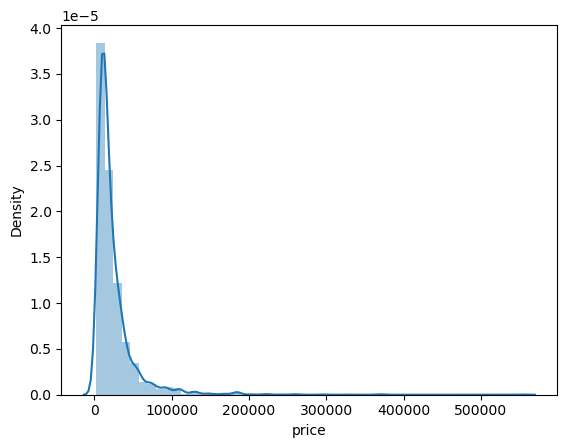

In [74]:
#I am investigating if the price has normal distribution, Unfortunately - still no
sns.distplot(df['price']);

C:\Users\liman\AppData\Local\Temp\ipykernel_6620\770370822.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x = 'district', y = 'price', data = df,


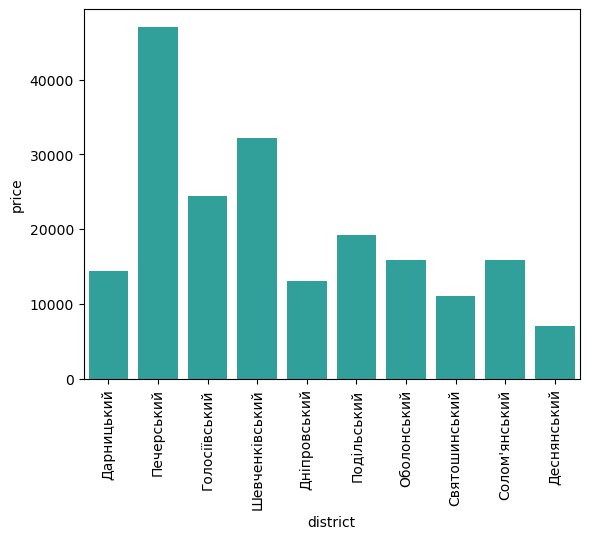

In [75]:
#districts and price
g=sns.barplot(x = 'district', y = 'price', data = df,
            color='lightseagreen',ci=None) 
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [76]:
#code of prestigious districts accorting to task and our results
code_prestigious = {'Печерський': 3,
                'Шевченківський': 3,
                'Подільський': 2,
                'Голосіївський': 2,
                'Святошинський': 1,
                'Солом\'янський': 2,
                'Оболонський': 2,
                'Дніпровський': 1,
                'Дарницький': 1,
                'Деснянський': 1}

# create a new column with the corresponding integers to the strings
df['prestigious'] = df['district'].map(code_prestigious)
df



,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14,prestigious
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN,1
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN,1
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN,3
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN,3
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1.0,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN,1
6053,https://rieltor.ua/flats-rent/view/10803998/,1.0,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN,1
6054,https://rieltor.ua/flats-rent/view/9615917/,2.0,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN,3
6055,https://rieltor.ua/flats-rent/view/10055853/,1.0,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN,1


In [92]:
#code of prestigious districts accorting to task and our results
code_type = {'Дизайнерський ремонт': 5,
                'Євроремонт': 4,
                'Чудовий стан': 4,
                'Хороший стан': 3,
                'Задовільний стан': 1,
                'Перша здача': 2,
                'Потрібен капітальний ремонт': 1,
                'Незавершений ремонт': 1,
                'Потрібен косметичний ремонт': 1,
                'Від будівельників вільне планування': 1,
                 'Незавершений ремонт': 1}

# create a new column with the corresponding integers to the strings
df['code type'] = df['type_of_condition'].map(code_condition)
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14,prestigious,code condition,code type
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN,1,5,5
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN,1,5,5
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN,3,4,4
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN,3,5,5
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1.0,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN,1,4,4
6053,https://rieltor.ua/flats-rent/view/10803998/,1.0,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN,1,4,4
6054,https://rieltor.ua/flats-rent/view/9615917/,2.0,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN,3,3,3
6055,https://rieltor.ua/flats-rent/view/10055853/,1.0,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN,1,1,1


<AxesSubplot:>

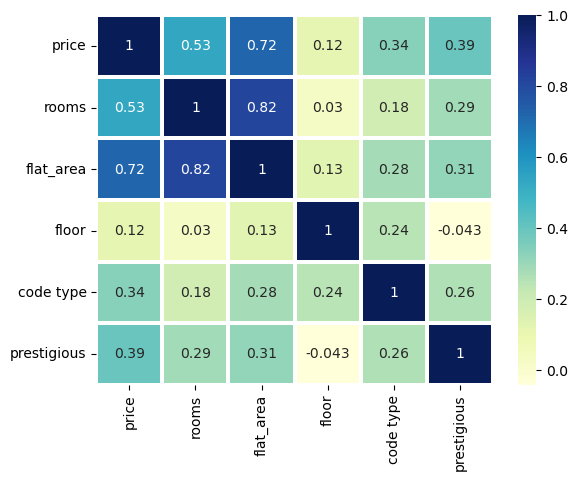

In [93]:
#First I am starting to look for some correlation between numeral categories
# a heatmap
corr=df[['price', 'rooms', 'flat_area', 'floor', 'code type', 'prestigious']].corr()
sns.heatmap(corr,annot=True,linewidths=1.5,cmap="YlGnBu")

<AxesSubplot:xlabel='rooms', ylabel='price'>

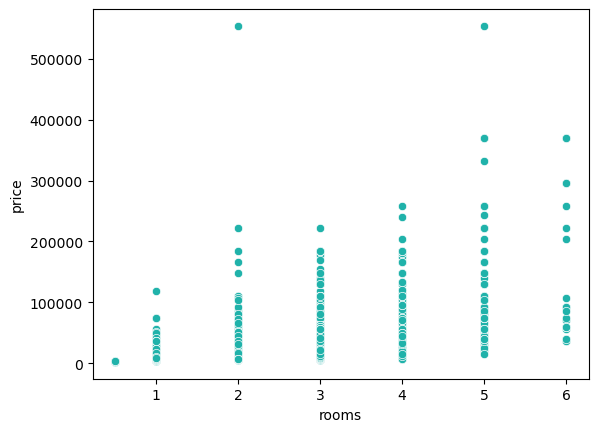

In [90]:
#Amount of rooms and price
sns.scatterplot(x='rooms', y='price',data=df, color = 'lightseagreen')

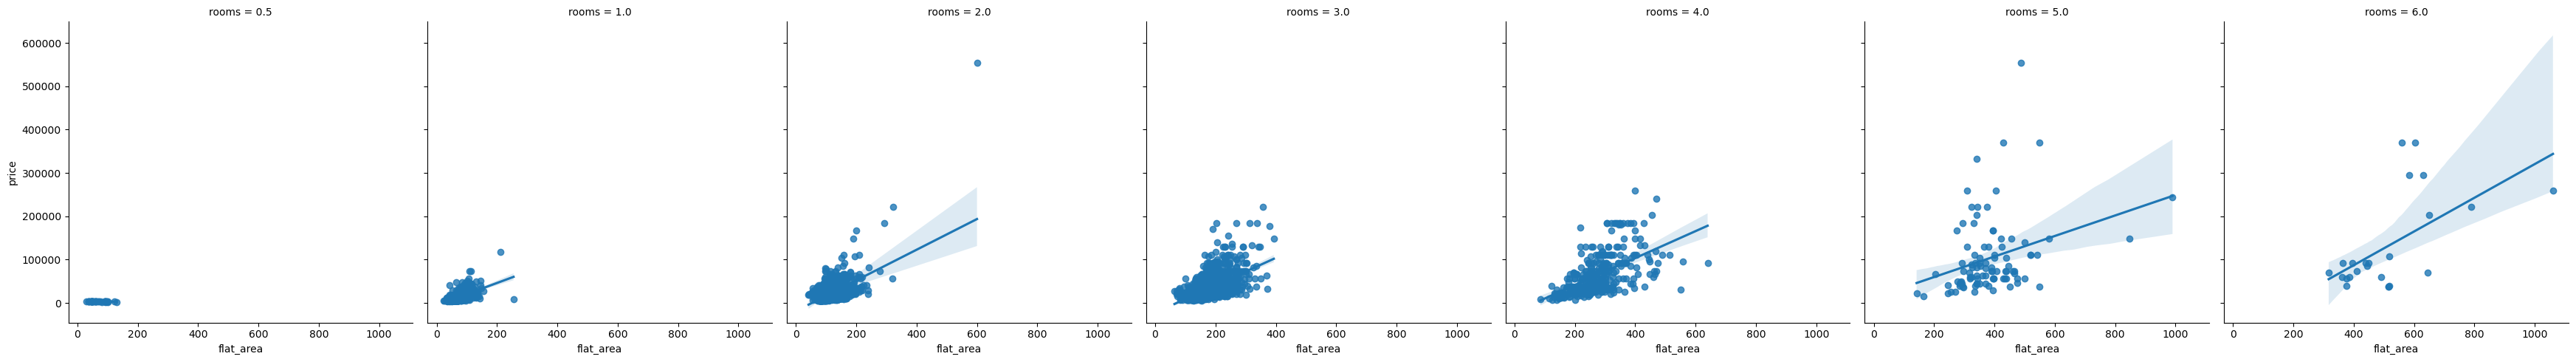

In [87]:
#Flat area, amount of rooms and price
sns.lmplot(x="flat_area", y="price", col="rooms",
               data=df)

In [ ]:
#There is some correlation here between flat area, number of rooms and price


<AxesSubplot:xlabel='flat_area', ylabel='price'>

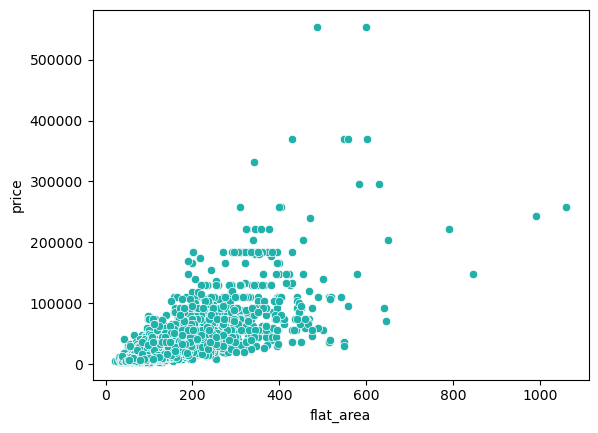

In [97]:
sns.scatterplot(x='flat_area', y='price',data=df, color = 'lightseagreen')

<AxesSubplot:xlabel='code type', ylabel='price'>

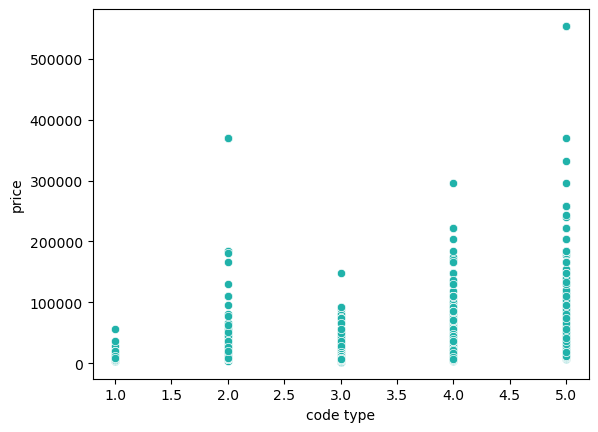

In [94]:
#Condition of flat and price
sns.scatterplot(x='code type', y='price',data=df, color = 'lightseagreen')

<AxesSubplot:xlabel='floor', ylabel='price'>

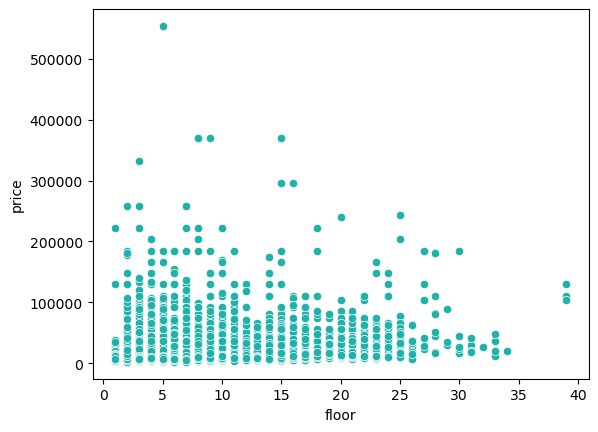

In [96]:
#Amount of rooms and price
sns.scatterplot(x='floor', y='price',data=df, color = 'lightseagreen')

<AxesSubplot:xlabel='prestigious', ylabel='price'>

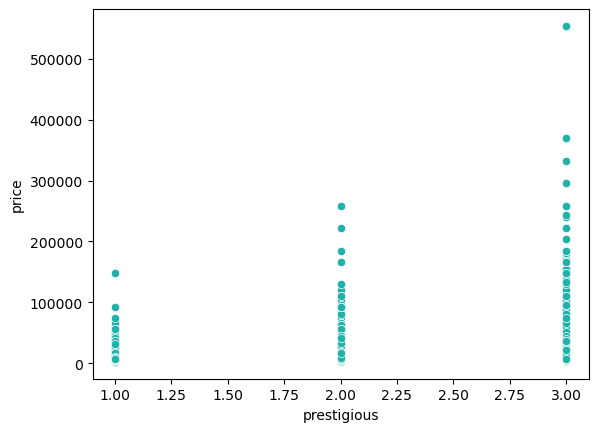

In [98]:
sns.scatterplot(x='prestigious', y='price',data=df, color = 'lightseagreen')

In [87]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [88]:
reg=LinearRegression()
reg

LinearRegression()

In [89]:
X=df[['rooms', 'flat_area', 'prestigious', 'floor', 'code type']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [92]:
reg.fit(X_train, y_train)

LinearRegression()

In [93]:
reg.score(X_train, y_train)

0.6110089207755796

In [94]:
reg.score(X_test, y_test)

0.628927066279416

In [95]:
#predict negative! I am sad( I will try other models and I will throw away all the very low and very high data

reg.predict([[1, 40, 1, 2, 2]])

C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1035.61072014])

In [ ]:
#so I made further cleaning of data

In [114]:
df.to_csv('new_parsing_Kyiv.csv', index=False)

In [115]:
df.to_excel('new_parsing_Kyiv.xlsx', index=False)

In [1]:
import pandas as pd

df = pd.read_excel('new_parsing_Kyiv.xlsx')
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,floor,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14,prestigious,code condition,code type
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,5,Українська цегла,Роздільне,Дизайнерський ремонт,NaN,1,5,5
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,5,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN,1,5,5
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,4,Стара цегла,Роздільне,Євроремонт,NaN,3,4,4
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,22000.0,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,3,None,Роздільне,Дизайнерський ремонт,NaN,3,5,5
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,55410.0,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,24,Українська цегла,Роздільне,Євроремонт,NaN,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,https://rieltor.ua/flats-rent/view/10620878/,1.0,16000.0,85.0,no,Святошинський,"Крамського Івана вул., 9",50.453461,30.372721,NaN,9,Бетонно монолітний,Роздільне,Євроремонт,NaN,1,4,4
6053,https://rieltor.ua/flats-rent/view/10803998/,1.0,9500.0,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,8,None,Роздільне,Євроремонт,NaN,1,4,4
6054,https://rieltor.ua/flats-rent/view/9615917/,2.0,6000.0,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,3,Українська цегла,Роздільне,Хороший стан,NaN,3,3,3
6055,https://rieltor.ua/flats-rent/view/10055853/,1.0,9000.0,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,3,Типова панель,Роздільне,Задовільний стан,NaN,1,1,1


In [2]:
#create bins of prices for further exluding the least important for model

bins = [0, 4000, 10000, 20000, 40000, 60000, 80000, 100000, 120000, 160000, 180000, 200000, 600000]
labels = ['<4000', '4000-10000', '10000-20000', '20000-40000', '40000-60000', 
          '60000-80000', '80000-100000', '100000-120000', '120000-160000', 
          '160000-180000', '180000-200000', '200000-600000']

# create a new column with the category for each price value
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# print the result
print(df)


                                              link  rooms    price  flat_area  \
0     https://rieltor.ua/flats-rent/view/10834307/    2.0  24500.0      109.0   
1     https://rieltor.ua/flats-rent/view/10832872/    2.0  24500.0      112.0   
2     https://rieltor.ua/flats-rent/view/10725408/    2.0  22000.0       94.0   
3     https://rieltor.ua/flats-rent/view/10766471/    2.0  22000.0       82.0   
4     https://rieltor.ua/flats-rent/view/10832868/    3.0  55410.0      161.0   
...                                            ...    ...      ...        ...   
6052  https://rieltor.ua/flats-rent/view/10620878/    1.0  16000.0       85.0   
6053  https://rieltor.ua/flats-rent/view/10803998/    1.0   9500.0       64.0   
6054   https://rieltor.ua/flats-rent/view/9615917/    2.0   6000.0       55.0   
6055  https://rieltor.ua/flats-rent/view/10055853/    1.0   9000.0       89.0   
6056  https://rieltor.ua/flats-rent/view/10548982/    2.0   7000.0       80.5   

      premium        distri

In [3]:
#find the precentage of each price category to find out if we need it for a model

# count the number of occurrences of each category
counts = df['price_category'].value_counts()

# calculate the percentage for each category
percentage = (counts / len(df)) * 100

print(percentage)

10000-20000      34.769688
4000-10000       28.776622
20000-40000      22.321281
40000-60000       7.132244
60000-80000       2.311375
80000-100000      1.584943
100000-120000     0.941060
<4000             0.627373
120000-160000     0.627373
200000-600000     0.396236
180000-200000     0.363216
160000-180000     0.148588
Name: price_category, dtype: float64


C:\Users\liman\AppData\Local\Temp\ipykernel_14124\2515512217.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  pr=sns.barplot(x=percentage.index, y=percentage.values,


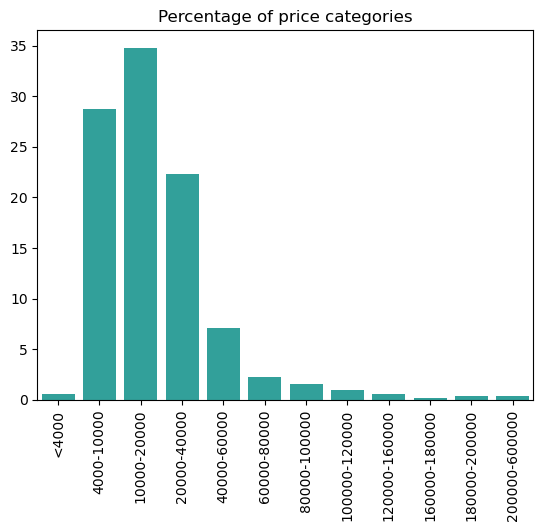

In [15]:
import matplotlib as plt
import seaborn as sns

pr=sns.barplot(x=percentage.index, y=percentage.values,
            color='lightseagreen',ci=None) 
pr.set_xticklabels(pr.get_xticklabels(), rotation=90)
pr.set_title('Percentage of price categories');

In [29]:
# All categories with 5% or less flats in it should be deleted
categories_to_delete = ['60000-80000', '80000-100000', '100000-120000', '<4000', '120000-160000',
                       '200000-600000', '180000-200000', '160000-180000']
rows_to_delete = df['price_category'].isin(categories_to_delete)

# delete the selected rows from the DataFrame
df = df.drop(df[rows_to_delete].index)

print(df)

                                              link  rooms    price  flat_area  \
0     https://rieltor.ua/flats-rent/view/10834307/    2.0  24500.0      109.0   
1     https://rieltor.ua/flats-rent/view/10832872/    2.0  24500.0      112.0   
2     https://rieltor.ua/flats-rent/view/10725408/    2.0  22000.0       94.0   
3     https://rieltor.ua/flats-rent/view/10766471/    2.0  22000.0       82.0   
4     https://rieltor.ua/flats-rent/view/10832868/    3.0  55410.0      161.0   
...                                            ...    ...      ...        ...   
6052  https://rieltor.ua/flats-rent/view/10620878/    1.0  16000.0       85.0   
6053  https://rieltor.ua/flats-rent/view/10803998/    1.0   9500.0       64.0   
6054   https://rieltor.ua/flats-rent/view/9615917/    2.0   6000.0       55.0   
6055  https://rieltor.ua/flats-rent/view/10055853/    1.0   9000.0       89.0   
6056  https://rieltor.ua/flats-rent/view/10548982/    2.0   7000.0       80.5   

      premium        distri

In [5]:
import matplotlib as plt
import seaborn as sns

C:\Users\liman\AppData\Local\Temp\ipykernel_14124\2546062129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


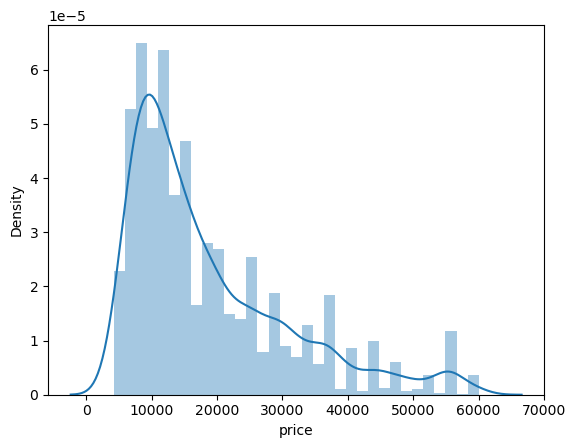

In [30]:
#and now we get another distribution
sns.distplot(df['price']);

<AxesSubplot:>

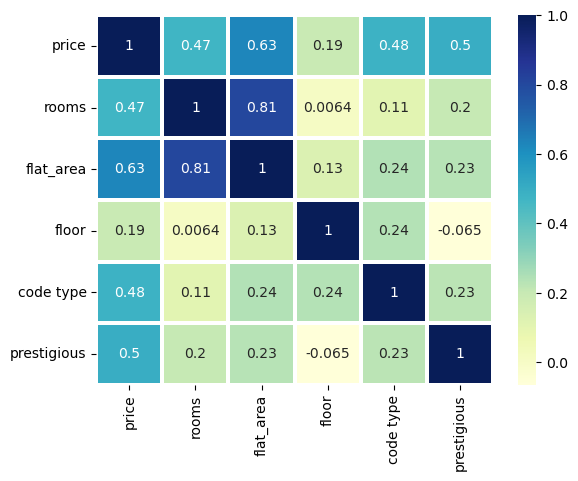

In [31]:
corr=df[['price', 'rooms', 'flat_area', 'floor', 'code type', 'prestigious']].corr()
sns.heatmap(corr,annot=True,linewidths=1.5,cmap="YlGnBu")
#floor does not matter

In [103]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [104]:
reg=LinearRegression()
reg

LinearRegression()

In [105]:
#I tried all features - rooms, flat of area, district - prestigious or not, code type - 
#type of flat condition (euro, design, good, bad etc)
X=df[['rooms', 'flat_area', 'prestigious', 'code type']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [106]:
reg.fit(X_train, y_train)

LinearRegression()

In [107]:
reg.score(X_train, y_train)

0.6108922158956034

In [108]:
reg.score(X_test, y_test)

0.5931459085851409

In [109]:
reg.predict([[1, 40, 1, 1]])

C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-4210.6382261])

In [110]:
#I tried all features - rooms, flat of area, district - prestigious or not, code type - 
#type of flat condition (euro, design, good, bad etc)
X=df[['rooms', 'flat_area', 'prestigious']]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [111]:
reg.fit(X_train, y_train)

LinearRegression()

In [112]:
reg.score(X_train, y_train)

0.528992411435973

In [113]:
reg.score(X_test, y_test)

0.544649722344871

In [115]:
reg.predict([[1, 40, 3]])

C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15997.10122142])

In [117]:
df.to_csv('new_dropped_parsing_Kyiv.csv', index=False)


In [118]:
df.to_excel('new_dropped_parsing_Kyiv.xlsx', index=False)